## 학습목표 

1. Tensorflow V2의 개요와 특징을 파악한다.
2. Tensorflow V2의 3가지 주요 API 구성방식을 이해하고 활용할 수 있다.
3. GradientTape를 활용해 보고 좀 더 로울벨의 딥러닝 구현방식을 이해한다.


## 26-2 Tensorflow2의 구성과 특징

Tensorflow V1의 특징과 문제점 
___

- 텐서플로우 같은 딥러닝 프레임워크가 없다면 딥러닝 구현 과정은 어려울 것이다.
- 텐서플로우나  파이토치 ㄱ같은 딥러닝 프레임워크들을 활용하면 쉽게 구현이 가능하다
- Tensorflow를 거대한 노드-엣지 사이의 유향 비순환 그래프로 정의했다는 점
- 노드와 노드를 연결하는 매 엣지마다 chain-rule 기반으로 gradient가 역방향으로 전파될 수 있다는 간단한 아이디어
- Tensorflow의 graph mode 라고 한다

문제점
____
- 딥러닝 모델을 구성하는 그래프를 그려나가는 부분과 그래프 상에서 연산이 실제 진행되어지는 과정을 분리
- 가장 중요한 것이 바로 session 이라는 개념
- 그래프 사이에 벌어지는 모든 연산은 반드시 session.run() 안에서 수행
- Tensorflow V1은 사용하기가 어려움 
- 코드가 길고 구현 방식 자체에 난이도가 노팓
- 그래프를 다 만들어 놓고 돌려봐야 모델 구성시의 문제가 드러나는데 문제가 발생했을때 해결하기 너무나 어렵고 복잡했기 때문

### Eager Mode를 수용하여 Tensorflow V2가 되다.
___
- 파이토치는 Eager Mode 라는 것은 제안 
- 딥러닝 그래프가 다 그려지지 않아도 얼마든 부분 실행 및 오류검증이 가능
- 또한 코드도 간결하고 파이써닉한 설계를 갖고 있기 때문에 개발자들에게 훨씬 쉽게 다가 갈 수 있다.
- Tensorflow V2는 이를 수용하여 사용방식을 변화 시켰다.

In [1]:
# 텐서플로 1.x
outputs = session.run(f(placeholder), feed_dict={placeholder: input})
# 텐서플로 2.x
outputs = f(input)

NameError: name 'session' is not defined

- 단순 코드의 간결함과 Session.run()에 의존하지 않고, 그래프를 완성하지 ㅏㄶ아도 부분적인 실행이 가능하다는 Eager Mode의 장점
- 이는 설계, 구현, 디버깅 전과정을 쉽고 직관적이게 만들어준다


## 26-3 Tensorflow2 API로 모델 구성하기

### TensorFlow2 API 알아보기
___
- TensorFlow2에서 딥러닝 모델을 작성하는 방법은 3가지
1. Sequential
2. Functional
3. Model Subclassing

- Functional 은 Sequential의 보다 일반화된 개념
- Subclassing은 클래스로 구현된 기존의 모델을 상속받아 자신만의 모델을 만들어가는 방식

### 1) TensorFlow2 Sequential Model
___


In [2]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(__넣고싶은 레이어__)
model.add(__넣고싶은 레이어__)
model.add(__넣고싶은 레이어__)

model.fit(x,y, epochs=10, batch_size=32)

SyntaxError: invalid syntax (<ipython-input-2-c5f6ee7dbebf>, line 5)

- model = keras.Sequential()
- Sequential 모델을 활용하면 손쉽게 딥러닝 모델을 쌓아나갈 수 있다.
- 입력부터 출력까지 레이어를 그야말로 sequential하게 차곡차곡 add 해서 쌓아가기만 하면됨
- 모델과 출력이 여러개인 경우에는 적합하지 않은 모델
- Sequential 모델은 반드시 입력 1가지, 출력 1가지를 전제

### 2) TensorFlow2 Functional API
___

In [1]:
import tensorflow as tf
from tensorflow import keras

inputs = keras.Input(shape=(__원하는 입력값 모양__))
x = keras.layers.__넣고 싶은레이어__(관련 파라미터)(input)
x = keras.layers.__넣고 싶은 레이어__(관련 파라마티)(x)
outputs = keras.layers.__넣고싶은 레이어__(관련 파라미터)(x)

model = keras.Model(inputs= inputs, outputs=outputs)
model.fit(x,y, epochs=10, batch_size=32)

SyntaxError: invalid syntax (<ipython-input-1-996a4e90bbfc>, line 4)

- 위 Sequential Model을 활용하는 것과 다른 점은 바로 keras.Model을 사용
- 사실 Sequnetial Model은 keras.Model을 상속받아 확장한 특수사례
- Functional API를 활용하면 __입력과 출력을 규정함으로써 모델 전체를 규정한다__
- Sequential Model의 제약점이1개의 입력/출력이라면 Functional API를 통해 다중입력/출력을 가지는 모델을 구성할 수 있다.

### 실습예제
___

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(784,))

In [3]:
# Just for demonstration purposes.
img_inputs = keras.Input(shape=(32, 32, 3))

In [4]:
inputs.shape
# feature 값만 존재?

TensorShape([None, 784])

In [5]:
inputs.dtype

tf.float32

In [6]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [7]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [8]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [9]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


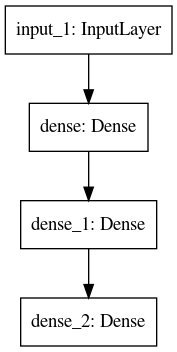

In [10]:
keras.utils.plot_model(model, "my_first_model.png")
# 왜 안되냐구.,..

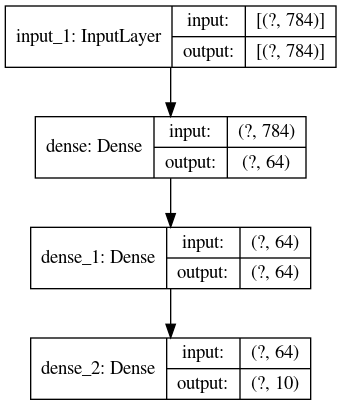

In [11]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])


Epoch 1/2
750/750 [==============================] - 1s 1ms/step - loss: 0.3375 - accuracy: 0.9047 - val_loss: 0.1832 - val_accuracy: 0.9478
Epoch 2/2
750/750 [==============================] - 1s 1ms/step - loss: 0.1566 - accuracy: 0.9543 - val_loss: 0.1390 - val_accuracy: 0.9597
313/313 - 0s - loss: 0.1360 - accuracy: 0.9588
Test loss: 0.13597463071346283
Test accuracy: 0.9588000178337097


### 저장 및 직렬화

- 모델 아키텍처
- 모델 가중치 값 (훈련 중에 학습 됨)
- 모델 학습 구성 (있는 경우) (compile 로 전달)
- 옵티마이저 및 상태(있는 경우) (중단한 지점에서 훈련을 다시 시작)

In [13]:
model.save("path_to_my_model_2.h5")
# del model
# # Recreate the exact same model purely from the file:
# model = keras.models.load_model("path_to_my_model")
# model

In [14]:
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model_2.h5")
model

NameError: name 'tensorflow' is not defined

In [15]:
tf.__version__

'2.3.1'

### 동일한 레이어 그래프를 사용하여 여러 모델 정의

- Functional API에서 모델은 레이어 그래프에 입력 및 출력을 지정하여 생성
- 즉 단일 레이어 그래프를 사용하여 여러 모델을 생성 할 수 있음
- 16차원 벡터로 변환하는 encoder 모델
- 하나는 훈련을 위한 엔드 autoencoder 엔드 autoencoder

In [20]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

### 모든 모델은 레이어처럼 호출 가능합니다.

- Input 또는 다른 레이어의 출력에서 모델을 호출하여 모든 모델을 레이어 인것처럼 처리
- 모델을 호출하면 모델의 아키텍처와 가중치도 재사용한다 

In [21]:
encoder_input = keras.Input(shape=(28,28,1), name="origin_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPool2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
origin_img (InputLayer)      [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   